In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r"C:\Users\hp\Desktop\dsc\dsc final data\train.csv")
test=df=pd.read_csv(r"C:\Users\hp\Desktop\dsc\dsc final data\test.csv")
train.head()


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
train.shape

(32978, 22)

In [4]:
train.isna().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
train.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,20620.844533,40.042392,258.808145,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,11878.692749,10.466038,259.565427,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10346.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20649.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30887.750000,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#train.describe(include='all')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [8]:
cols = train.columns

num_cols = train._get_numeric_data().columns

cat=list(set(cols) - set(num_cols))
cat

['poutcome',
 'marital',
 'default',
 'day_of_week',
 'y',
 'contact',
 'housing',
 'job',
 'month',
 'loan',
 'education']

In [9]:
train2=pd.DataFrame()
train2=train.drop(columns=cat,axis=1)
test2=test.drop(columns=['month',
 'job',
 'loan',
 'education',
 'contact',
 'default',
 'marital',
 'day_of_week',
 'housing',
 'poutcome'],axis=1)
col2=list(train2.columns)
col2

['id',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## Standardizing

In [10]:
for x in col2:
    train2[x]=train[x]/(train[x].max())

train2['y']=train['y']

def change(x):
    if x=='yes':
        return 1
    else:
        return 0

train2['y']=train2['y'].apply(change)
train2.head()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000000,0.571429,0.053070,0.017857,1.0,0.0,0.785714,0.991843,1.35316,0.962735,0.992904,0
1,0.000024,0.581633,0.030297,0.017857,1.0,0.0,0.785714,0.991843,1.35316,0.962735,0.992904,0
2,0.000049,0.377551,0.045954,0.017857,1.0,0.0,0.785714,0.991843,1.35316,0.962735,0.992904,0
3,0.000097,0.571429,0.062424,0.017857,1.0,0.0,0.785714,0.991843,1.35316,0.962735,0.992904,0
4,0.000121,0.459184,0.040260,0.017857,1.0,0.0,0.785714,0.991843,1.35316,0.962735,0.992904,0


In [11]:
train2['y'].value_counts()

0    29241
1     3737
Name: y, dtype: int64

## Y histogram

No handles with labels found to put in legend.


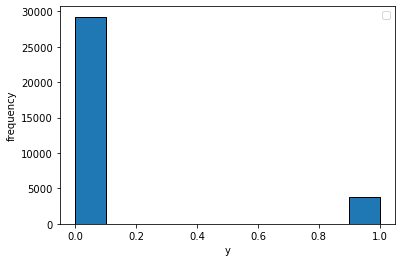

In [32]:
plt.hist(train2['y'],edgecolor='black',bins=10)
plt.xlabel("y")
plt.ylabel("frequency")


## Marital status histogram

Text(0.5, 0, 'Marital')

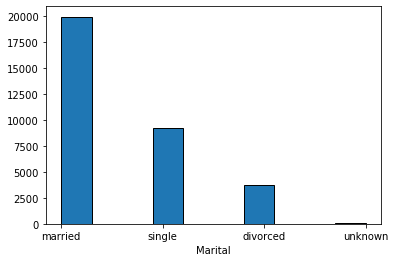

In [33]:
plt.hist(train['marital'],edgecolor='black',bins=10)
plt.xlabel("Marital")

## Loan histogram

Text(0.5, 0, 'loan')

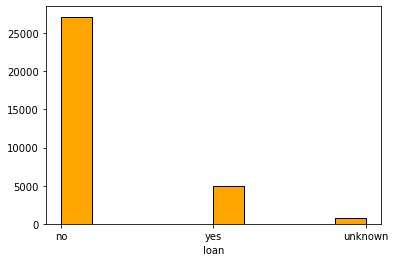

In [34]:
plt.hist(train['loan'],edgecolor='black',bins=10,color='orange')
plt.xlabel("loan")

(array([14937.,     0.,     0.,     0.,     0., 17252.,     0.,     0.,
            0.,   789.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

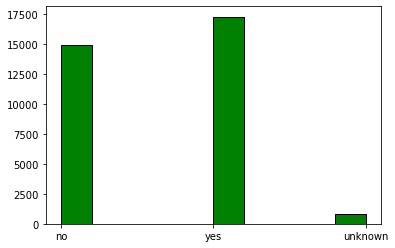

In [15]:
plt.hist(train['housing'],edgecolor='black',bins=10,color='green')

## Age histogram

(array([6.300e+01, 2.430e+02, 1.012e+03, 1.232e+03, 3.381e+03, 4.506e+03,
        2.810e+03, 3.736e+03, 3.087e+03, 1.736e+03, 2.508e+03, 2.186e+03,
        1.913e+03, 1.139e+03, 1.599e+03, 1.081e+03, 1.100e+02, 1.250e+02,
        9.600e+01, 5.800e+01, 1.020e+02, 7.500e+01, 5.300e+01, 4.100e+01,
        3.700e+01, 2.000e+01, 2.200e+01, 3.000e+00, 2.000e+00, 2.000e+00]),
 array([17. , 19.7, 22.4, 25.1, 27.8, 30.5, 33.2, 35.9, 38.6, 41.3, 44. ,
        46.7, 49.4, 52.1, 54.8, 57.5, 60.2, 62.9, 65.6, 68.3, 71. , 73.7,
        76.4, 79.1, 81.8, 84.5, 87.2, 89.9, 92.6, 95.3, 98. ]),
 <a list of 30 Patch objects>)

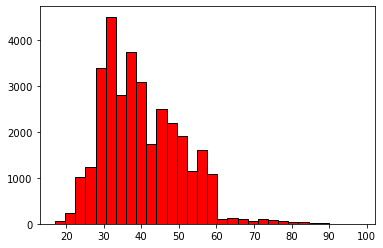

In [16]:
plt.hist(train['age'],edgecolor='black',bins=30,color='red')

Most clients lie in the age gap of 25-60 years.

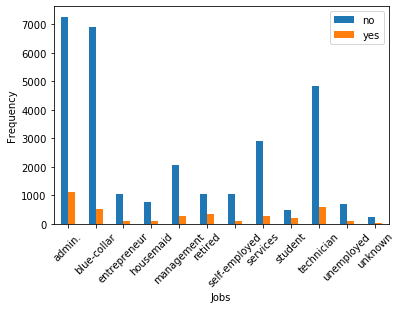

In [17]:
pd.crosstab(train['job'],train['y']).plot(kind='bar')

plt.xlabel('Jobs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.legend()

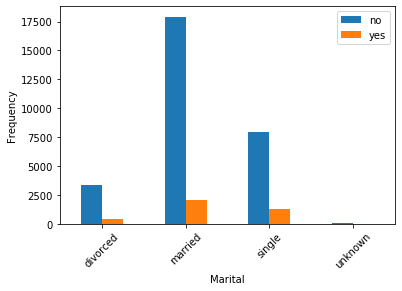

In [18]:
pd.crosstab(train['marital'],train['y']).plot(kind='bar')

plt.xlabel('Marital')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.legend()

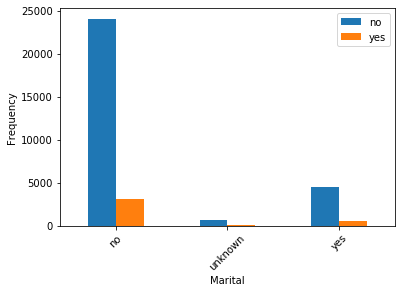

In [35]:
pd.crosstab(train['loan'],train['y']).plot(kind='bar')

plt.xlabel('Marital')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.legend()

In [19]:
train_f=pd.DataFrame()
cal=train2.columns.unique()
for x in cal:
    if x=='y':
        continue
    else:
        train_f[x]=train2[x]
        
test_f=pd.DataFrame()
cal=test2.columns.unique()
for x in cal:
    if x=='y':
        continue
    else:
        train_f[x]=train2[x]

In [43]:
freq=train['month'].value_counts()
freq

may    10951
jul     5745
aug     4953
jun     4257
nov     3285
apr     2147
oct      580
sep      462
mar      447
dec      151
Name: month, dtype: int64

Text(0, 0.5, 'No. of products')

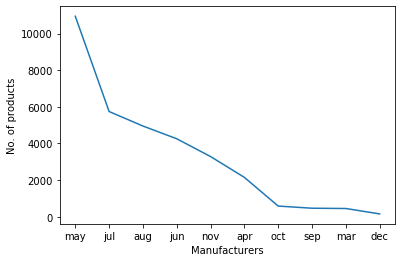

In [44]:
plt.plot(freq)
plt.xlabel("Manufacturers")
plt.ylabel("No. of products")

In [20]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(train_f, train2['y'])

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
res=pd.DataFrame(test2['id'])
res['y'] = classifier.predict(test2)

In [22]:
def change(x):
    if x==1:
        return 'yes'
    else:
        return 'no'

res['y']=res['y'].apply(change)

In [23]:
#res.to_csv(r"C:\Users\hp\Desktop\dsc\dsc final data\result1.csv",index=False)

In [24]:
res.shape

(8210, 2)

In [25]:
res.tail()

,id,y
8205,41172,yes
8206,41174,yes
8207,41177,yes
8208,41181,yes
8209,41184,yes
